In [ ]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

## Reading the data files
Here we are only reading the files of the variables we ares interested in.

In [ ]:
path = r'/home/daniel/code/costofcare/data/bhp_ukhls_data_stata/UKDA-6614-stata/stata/ukhls'
all_files = glob.glob(os.path.join(path , '*indresp.dta'))
raw_colnames = ['hidp', 'sex', 'ethn_dv', 'dvage', 'mastat_dv', 'country', 'aidhh', 'aidhrs', 'aidxhh']
indresp = []
for filename in all_files:
    prefix = filename.split('/')[-1][0:2]
    colnames = [f'{prefix}{x}' for x in raw_colnames]
    df = pd.read_stata(filename,
                       columns=['pidp'] + colnames,
                      index_col='pidp')
    indresp.append(df)

In [ ]:
all_files = glob.glob(os.path.join(path , '*income.dta'))
raw_colnames = ['ficode', 'frmnth_dv', 'frmnthimp_dv']
income = []
for filename in all_files:
    prefix = filename.split('/')[-1][0:2]
    colnames = [f'{prefix}{x}' for x in raw_colnames]
    df = pd.read_stata(filename,
                       columns=['pidp'] + colnames)
    income.append(df)

## Concatenating the files by pidp
`pidp` is the unique identifiers of the person in each data file. Here, we are performing a very naive, all cases included, wide-format concatenation.

In [ ]:
indresp_df = pd.concat(indresp, axis=1)

### General overview of `aidhh` 'cares for sick/disabled/elderly in household' across the 12 waves

In [ ]:
indresp_df.a_aidhh.value_counts().plot.bar()

In [78]:
def to_matrix(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]
aid_cols = []
for ele in indresp_df.columns:
    if 'aidhh' in ele:
        aid_cols.append(ele)
cols_n = 3
aid_names = to_matrix(aid_cols, cols_n)

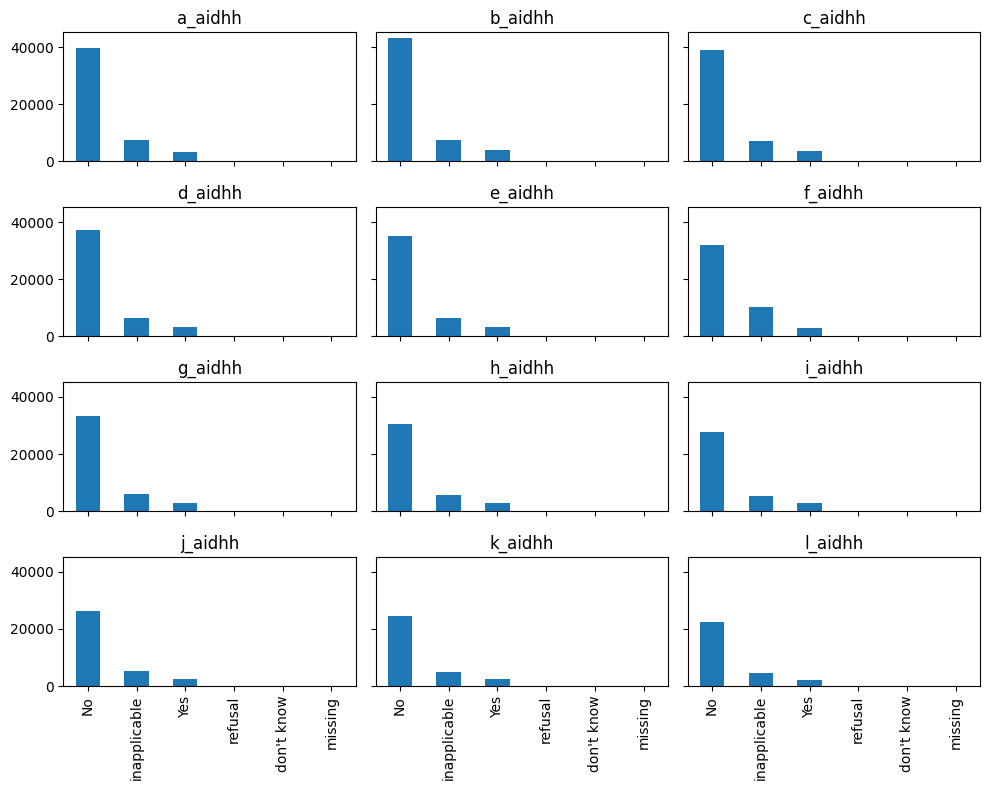

In [94]:
fig, axs = plt.subplots(4, 3, figsize=(10, 8), sharex=True, sharey=True)
for i in range(len(aid_names)):
    for j in range(cols_n):
        indresp_df[aid_names[i][j]].value_counts().plot.bar(ax=axs[i][j])
        axs[i][j].set_title(aid_names[i][j])
fig.tight_layout()

In [75]:
len(aid_names[0])

3